# **Predicting the Melting Points of UF₄ and FUNaK Mixtures Using Machine Learning**

## **Abstract**

The goal of this project was to develop a machine learning model to predict the melting points of uranium tetrafluoride (UF₄) and FUNaK (NaF-KF-UF₄) molten salt mixtures, which are relevant to the design and safety of molten salt reactors. Experimental determination of melting points for these salts is limited and often challenging due to their corrosiveness, high melting temperatures, and radiological hazards. A dataset of 43 samples was compiled from scientific literature and technical reports. Input features included molar composition, calculated ionic properties (e.g., average ionic radius, charge, electronegativity), molecular weight, and heating rate. Three regression models were implemented and compared: a linear regression (PyTorch), Random Forest, and XGBoost. The linear model performed poorly (R² = -9.22, MAE = 403.15 K, RMSE = 418.68), indicating it was insufficient to capture the complexity of the system. Random Forest improved significantly (R² = 0.90, MAE = 18.90 K, RMSE = 42.23), while XGBoost achieved the best performance (R² = 0.97, MAE = 13.24 K, RMSE = 21.19 K). These results suggest that tree based models are well suited for predicting molten salt melting points from small datasets. These results show that tree based machine learning models can effectively capture patterns in small material datasets, offering a practical alternative to experimental or thermodynamic modeling in early stage salt screening. Some limitations include possible data leakage due to overlapping compositions and the scarcity of validated UF₄ melting point data.

## **Introduction**

Molten salt reactors (MSRs) are an emerging class of nuclear reactors that use salt mixtures as both fuel and coolant. One of the most critical thermophysical properties in the design of these reactors is the melting point of the salt mixture. This is particularly important for salts like uranium tetrafluoride (UF₄) and its mixtures with sodium fluoride (NaF) and potassium fluoride (KF),referred to as FUNaK mixtures. These materials are not only chemically reactive and corrosive but also radioactive, making experimental determination of their melting points costly, hazardous, and technically challenging.

Previous efforts to estimate melting points of salt mixtures have mostly relied on thermodynamic models such as CALPHAD (e.g., Glushko 1994; Barin 1995), which use phase diagrams and Gibbs free energy minimization. While effective, these methods require extensive experimental data and are computationally intensive. More recently, machine learning has been explored for predicting material properties. Recent work by Wang et al., applied machine learning to predict eutectic temperatures of molten salts such as LiCl-KCl, demonstrating the potential of data driven models in place of traditional thermodynamic calculations. Although the chemical systems differ from FUNaK, the methodology is directly relevant to our objective and supports the feasibility of machine learning based melting point prediction in nuclear salt applications.

In this project, I propose a machine learning based approach to predict the melting point of UF₄ and FUNaK mixtures using a small, curated dataset collected from scientific literature and thermophysical databases (e.g., NIST, ORNL). Our feature set includes molar fractions, ionic radius, electronegativity, ionic charge, molecular weight, and heating rate. Due to the limited dataset (43 samples), I initially explored linear regression as a baseline model, followed by Random Forest and XGBoost regressor models to capture potential nonlinear relationships in the data.

The XGBoost model achieved the best results, with a mean absolute error (MAE) of 13.24K, root mean squared error (RMSE) of 21.19K, and an R² score of 0.97 on the test set. These results indicate that tree based models are promising tools for property prediction in complex molten salt systems and may offer a fast, low cost alternative to experimental methods in early stage MSR design.

## **Methodology**

The goal of this project was to predict the melting points of UF₄ and FUNaK fluoride salt mixtures using machine learning techniques.

Previous approaches on predicting the melting points of molten salts have mainly been with thermodynamic models and empirical mixing rules. For example, Calphad ('CALculation of PHAse Diagrams') modeling, uses experimental phase diagrams and Gibbs free energy calculations to estimate melting temperatures, but this requires extensive experimental data and can be computationally expensive. More recently, machine learning has been applied to property predictions of materials, this includes melting points of salt mixtures. Studies have used Random Forest, Neural Networks, and Graph Neural Networks (GNNs) to predict melting temperatures based on elemental and structural properties.

The methodology in this project focused on dataset construction, feature engineering, and the implementation of multiple regression models to evaluate predictive performance. It applies machine learning to a niche, nuclear materials dataset focused on UF₄ and eutectic fluoride molten salts. Only a handful of UF₄ melting point data points exist in literature, making model generalization challenging.

**Compilation of Data & Preprocessing**

Data was manually collected from scientific articles and technical reports (e.g., ORNL, NIST).

Each row in the dataset corresponds to a unique salt composition, and includes measured thermophysical properties.

The final dataset contained 43 samples, with a mix of pure, binary, and ternary fluoride salt systems.

Preprocessing included:

*   Handling missing values: Rows with missing melting point values were removed; other features with missing values were retained only if informative
*   All input features were standardized using StandardScaler to ensure consistent input ranges across models.
*   Outlier handling: A known UF₄ outlier (1309K from a 1960 paper, see References) was kept for model robustness evaluation and discussed further in the Results section.

**Feature Engineering**

Several original features were derived from the salt compositions such as average ionic radius, charge, and electronegativity, based on mole fractions and periodic table data. Other features, such as Heating_Rate_Kmin, and Melting_Point_K were directly taken from experimental reports and included in the model as is.

**Model Implementation and Evaluation**

Three machine learning models were implemented and compared:

1. Linear Regression Model implemented in PyTorch.
2. Random Forest Regressor Model to capture nonlinear relationships between features.
3. XGBoost Regressor Model which performed the best, uses gradient boosting to improve predictions.

All models were evaluated using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R².

Due to the limited dataset size (43 samples), the data was split into training and testing sets only. A separate validation set was not used. Hyperparameters for tree-based models were kept fixed to prevent overfitting, and model comparison was based on a 30% test set. For larger datasets, a validation set would be recommended.

Below is an image of the XGBoost Regressor Model (see References for source).
![XGBoost Diagram](https://drive.google.com/uc?export=view&id=1Mv32VnpLC67oE5hEOTpBLfzCxvaAAU-Z)


# How XGBoost Works:

1. **Starting Prediction:** XGBoost begins by making an initial prediction on the training set, usually by taking the mean of the target variable.

2. **Calculating Errors:** Next, it calculates the residuals; these are the differences between the actual values and the model's predictions. These residuals show how far off the prediction was.

3. **Building the First Tree:** A decision tree is then built to model the residuals. This tree looks for the best feature splits that can reduce the prediction errors as much as possible.

4. **Adding More Trees:**
Rather than starting from scratch, XGBoost keeps adding trees one at a time. Each new tree is trained to fix the errors made by the current model (it targets the latest residuals), gradually improving accuracy with each step.

5. **Optimizing with a Loss Function:**
During training, XGBoost uses a loss function to measure how well it's doing. The algorithm adjusts itself to minimize this loss, helping it move closer to accurate predictions.

6. **Deciding When to Stop:**
The model continues adding trees until it meets a stopping rule; such as hitting the maximum number of trees (which is our case), seeing minimal improvement in performance, or reaching a desired accuracy.

## **Experimental Setup**

**Dataset**

The dataset consists of 43 samples representing various fluoride salt systems, including:

*   Pure compounds (NaF, KF, UF₄)
*   Binary mixtures (KF-UF₄, NaF-UF₄)
*   Ternary eutectic systems, FUNaK (KF-NaF-UF₄)

Each sample has these features:


*   NaF_MoleFrac, KF_MoleFrac, UF4_MoleFrac: Molar fraction composition of each component.

*   Avg_Ionic_Radius: Based on weighted mole fractions.

*   Avg_Ionic_Charge: Average charge of ions.

*   Avg_Electronegativity: Average Pauling electronegativity.

*   Molecular_weight_gmol: Molecular weight of the mixture (g/mol).

*   Heating_Rate_Kmin:Heating rate used in the experiment (K/min).

*   Melting_Point_K: Target variable, measured melting point in Kelvin.

Data was compiled manually from the literature, including reports from ORNL, NIST, and journal publications.

Most of these measurements used differential scanning calorimtery (DSC) to obtain the melting temperature of the salts.

**Machine Learning Techniques**

Three different models were evaluated, as listed below.

1.   Linear Regression Model: Hyperparameters include lr=0.001, epochs=500, random_state=42, optimizer=SGD.
2.   Random Forest Regressor Model: n_estimators=100, random_state=42.
3.   XGBoost Regressor Model: n_estimators=100, random_state=42, lr=0.1, max_depth=3.



Below is a screenshot of the entire Dataset (csv file) used in this project.
![Dataset CSV](https://drive.google.com/uc?export=view&id=1Sqy4_mN0rtniGIDqLYDhgL8nLPAGO69x)


## **Experimental Results**

In [ ]:
# Download the CSV data
!pip install -q gdown
import gdown

file_id = "10w_3vVdlVJqJMGG9bwl8dDcaVuk6FrSb"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Data.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10w_3vVdlVJqJMGG9bwl8dDcaVuk6FrSb
To: /content/Data.csv
100%|██████████| 3.24k/3.24k [00:00<00:00, 6.62MB/s]


'Data.csv'

In [ ]:
# Make sure it can be accessed
import pandas as pd
df = pd.read_csv("Data.csv")
print("Columns:", df.columns.tolist())
print(df.head()) # First 5 samples

Columns: ['Compound', 'Mixture_Type', 'NaF_MoleFrac', 'KF_MoleFrac', 'UF4_MoleFrac', 'Avg_Ionic_Radius', 'Avg_Ionic_Charge', 'Avg_Electronegativity', 'Molecular_weight_gmol', 'Heating_Rate_Kmin', 'Melting_Point_K']
  Compound Mixture_Type  NaF_MoleFrac  KF_MoleFrac  UF4_MoleFrac  \
0      NaF         Pure         1.000        0.000         0.000   
1       KF         Pure         0.000        1.000         0.000   
2      UF4         Pure         0.000        0.000         1.000   
3      UF4         Pure         0.000        0.000         1.000   
4    FUNaK     Ternary          0.556        0.187         0.257   

   Avg_Ionic_Radius  Avg_Ionic_Charge  Avg_Electronegativity  \
0           1.02000             1.000                  0.930   
1           1.38000             1.000                  0.820   
2           1.00000             4.000                  1.380   
3           1.00000             4.000                  1.380   
4           1.08218             1.771                  1

# Linear Regression Model
Linear Regression Model is used first as a baseline starting point.

In [ ]:
import numpy as np
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import random


def set_seed(seed=42):
    """
    Sets the random seed for reproducibility.

    Args:
        seed (int): The random seed to use.

    Returns:
        None
    """
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)


def load_dataset(csv_path):
    """
    Loads the melting point dataset from CSV file.

    Args:
        csv_path (str): Path to the CSV file.

    Returns:
        X_scaled (np.ndarray): Scaled feature matrix (numerical features).
        y (pd.Series): Target variable (melting point in Kelvin).
    """
    # Load dataset
    df = pd.read_csv(csv_path)

    # Drop non-numeric columns
    df.drop(columns=['Compound', 'Mixture_Type'], inplace=True)

    # Separate target and features
    y = df['Melting_Point_K']
    X = df.drop(columns=['Melting_Point_K'])

    # Normalize feature matrix
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y


class LinearRegressionModel(nn.Module):
    """
    Linear regression model in PyTorch.

    Args:
        input_dim (int): Number of input features.
    """
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)


def train_model(model, X_train, y_train, lr=0.01, epochs=1000):
    """
    Trains PyTorch linear regression model.

    Args:
        model (nn.Module): Model to train.
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels.
        lr (float): Learning rate.
        epochs (int): Number of training epochs.

    Returns:
        model (nn.Module): Trained model.
    """
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model


def evaluate_model(model, X_test, y_test):
    """
    Evaluates the PyTorch model using MAE, RMSE, and R².

    Args:
        model (nn.Module): Trained model.
        X_test (np.ndarray): Test feature matrix.
        y_test (np.ndarray): True target values.

    Returns:
        dict: Dictionary of MAE, RMSE, and R² scores.
    """
    model.eval()
    with torch.no_grad(): # Get predictions without tracking gradients.
        predictions = model(X_test).squeeze().numpy()

    y_true = y_test.numpy()
    return {
        "MAE": mean_absolute_error(y_true, predictions),
        "RMSE": np.sqrt(mean_squared_error(y_true, predictions)),
        "R²": r2_score(y_true, predictions)
    }

In [ ]:
set_seed(42)

# Load and extract features from data
csv_path = "Data.csv"
X, y = load_dataset(csv_path)

# Split data: 70% train and 30% test
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y.values, test_size=0.3, random_state=42
)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32).view(-1, 1) # Shape (N, 1)
y_test = torch.tensor(y_test_np, dtype=torch.float32) # Shape (N,)

# Initialize and train model
model = LinearRegressionModel(input_dim=X.shape[1])
model = train_model(model, X_train, y_train, lr=0.001, epochs=500)

# Evaluate model
metrics = evaluate_model(model, X_test, y_test)

print("Evaluation Results (test set):")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

Evaluation Results (test set):
MAE: 403.15
RMSE: 418.68
R²: -9.22


In [ ]:
# This will print a comparison between the actual and predicted values for the test set.

# Get the actual predicted values in NumPy format, used to create DataFrame
with torch.no_grad():
    y_pred = model(X_test).squeeze().numpy()

# Create DataFrame
comparison = pd.DataFrame({
    'Actual': y_test.numpy(),
    'Predicted': y_pred
})
print(comparison)


         Actual   Predicted
0    950.000000  578.767395
1   1018.000000  718.423950
2   1005.000000  718.400024
3    951.000000  578.747681
4    988.000000  578.829834
5    947.000000  578.798279
6    809.349976  361.637085
7    810.250000  369.497467
8    808.950012  363.222443
9   1309.000000  569.163452
10   807.950012  364.237793
11   887.000000  578.909668
12   887.000000  578.854248


The Evaluation Results on the test set indicate the model is not learning well.

*   The MAE of 403.15 tell us that the predictions are off by about 403K, this is very high.
*   RMSE of 418.68 is also quite high, RMSE penalizes large errors.
*   The R² value is negative, indicating the model is performing worse than just predicting the mean, in other words it is not capturing the trend at all!
*   Looking at the comparison between the actual and predicted values for each sample in the test set we can clearly see how far off the model is for each sample. It is consistently predicting a melting point much lower than the actual value.



This could be due to the limited dataset, the model being too simple, or the features are not fully predictive (maybe more features are required).




# Random Forest Model
Will try a more complex model, if there are nonlinear patterns in the data then this model should capture it unlike the previous linear model.

In [ ]:
def evaluate_model_sklearn(y_true, y_pred):
    """
    Evaluates a regression model using standard metrics.

    Args:
        y_true (np.ndarray): True target values.
        y_pred (np.ndarray): Predicted target values.

    Returns:
        dict: MAE, RMSE, and R² score.
    """
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R²": r2_score(y_true, y_pred)
    }

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_scaled, y = load_dataset("Data.csv") # Load data from before

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
metrics = evaluate_model_sklearn(y_test, y_pred)

print("Evaluation Results (on test set):")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")


Evaluation Results (on test set):
MAE: 18.90
RMSE: 42.23
R²: 0.90


In [ ]:
# Print a comparison between the actual and predicted values for the test set.

comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison)


     Actual  Predicted
37   950.00   951.2800
24  1018.00  1008.6800
25  1005.00  1012.6700
36   951.00   949.5000
34   988.00   936.0900
39   947.00   949.1600
4    809.35   808.3345
12   810.25   809.3115
8    808.95   808.8775
3   1309.00  1168.2135
6    807.95   811.8765
27   887.00   909.2190
31   887.00   884.0900


The Evaluation Results on the test set indicate this model is learning much better than the simple linear regression!

*   The MAE of 18.90 tell us that the predictions are off by about 18.9K, this is much lower than before but still high.
*   RMSE of 42.23 is also a bit high, but again a big improvement from 418.68 from before.
*   The R² value is positive now with a value of 0.9, indicating there is a strong correlation between the features used to fit the model to the data.
*   Looking at the comparison between the actual and predicted values for each sample in the test set we see a significant improvement, with some of them almost being an exact match.

This tells us that the linear regression model from before was too simple to find patterns within the dataset and that there is a nonlinear pattern in the data. However the model is not perfect, either more data could be used or we can try another model next to see how the outcome will change.

This Random Forest model should be used as a baseline instead of the Linear Regression model. The results from the Linear Regression model are still important however as it indicates to us that the pattern between the features is more complex and nonlinear.

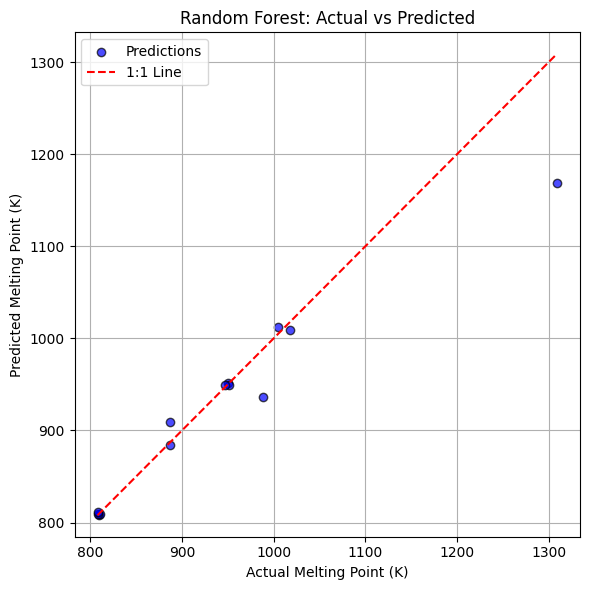

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k', label='Predictions')

# Add 1:1 line using matching min/max for x and y axes
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', label='1:1 Line')  # 1:1 reference line
plt.xlim(lims)
plt.ylim(lims)

# Labels and styling
plt.xlabel("Actual Melting Point (K)")
plt.ylabel("Predicted Melting Point (K)")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

Most points fall close to the reference line, meaning the model is predicting melting points accurately across the test set.

There is one main outlier around (actual ~1310, predicted ~1160).

For the most part, the model performs well for most compounds. However, the outlier could be due to a high variance compound or the original data collected for that point is unreliable. In other words, they may have a measurement error or unusual composition. This can be somewhat verified by checking how long ago the measurement was completed (was it longer than 5-10yrs ago?), and reading into the source to see if the compound had any unusual properties or contamination.


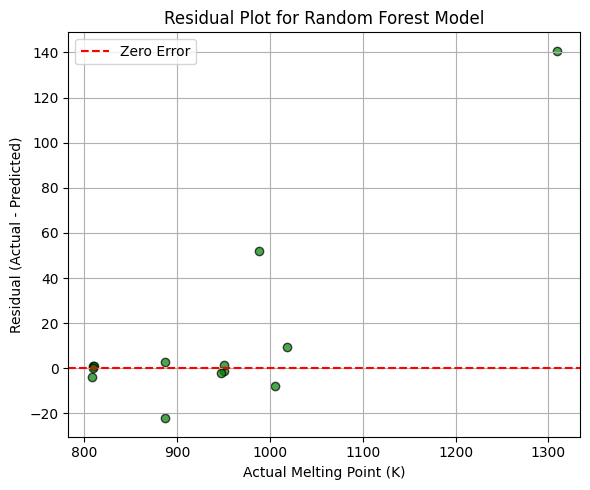

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs actual values
plt.figure(figsize=(6, 5))
plt.scatter(y_test, residuals, alpha=0.7, edgecolor='k', color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Zero Error')

# Labels
plt.xlabel("Actual Melting Point (K)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot for Random Forest Model")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Since the residuals are centered near 0, we can say that the model is not biased overall.

Most points have residuals between -20 and +20, showing good predictive accuracy.

Unsurprisingly, the large positive residual from the outlier stands out (Residual ~140K) reflecting that it is indeed the largest prediction error.

Overall, the Random Forest model shows strong agreement between predicted and actual melting points, with most samples being close to the 1:1 line. One significant outlier can be observed around 1309 K, where the model  underpredicted the melting point. This discrepancy was also reflected in the residual plot. Further investigation into the source of this outlier could determine whether it is due to experimental uncertainty, outdated data, or compositional anomalies. Aside from this, residuals were low and randomly distributed, indicating unbiased and stable model performance.

# XGBoost Model
XGBoost is also a tree based model like Random Forest but trains differently. Instead of training all trees independently, it builds them consecutively, where each new tree corrects the errors of the previous ones. This can lead to better performance, especially on small datasets. Since it's more sensitive to patterns in the data, XGBoost may perform better than Random Forest if subtle nonlinear trends exist.

In [ ]:
!pip install xgboost # Install if you do not already have

from xgboost import XGBRegressor

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) # 30% of data for testing

In [ ]:
# Train XGBoost model
model = XGBRegressor(
    n_estimators=100, # number of boosting trees
    learning_rate=0.1, # step size reduced to prevent overfitting
    max_depth=3, # how many splits from root node to the leaf nodes
    random_state=42 # ensures reproducibility of the results
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions for XGBoost Model
y_pred = model.predict(X_test)

metrics = evaluate_model_sklearn(y_test, y_pred)

# Print MAE, RMSE, and R²
print("Evaluation Results (on test set):")
for key, value in metrics.items():
    print(f"{key}: {value:.2f}")

Evaluation Results (on test set):
MAE: 13.24
RMSE: 21.19
R²: 0.97


In [ ]:
# Print a comparison between the actual and predicted values for the test set.

comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(comparison)

     Actual    Predicted
37   950.00   950.552246
24  1018.00  1012.537720
25  1005.00  1012.537720
36   951.00   950.552246
34   988.00   948.544250
39   947.00   948.521973
4    809.35   809.881714
12   810.25   851.981323
8    808.95   851.981323
3   1309.00  1304.727539
6    807.95   809.048645
27   887.00   910.960999
31   887.00   884.442932


XGBoost outperformed the previous models: linear regression and Random Forest, achieving the lowest error (MAE of 13.24 and RMSE of 21.19) and the highest R² score (0.97). This indicates that the model is capturing nearly all the variance in the melting point data. The improvement likely comes from XGBoost's training approach compared to the independently built trees of Random Forest.

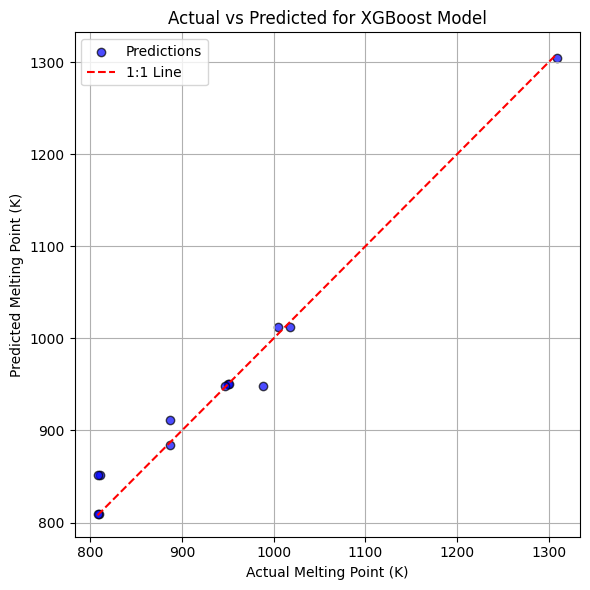

In [ ]:
# Plot XGBoost predicted vs actual values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolor='k', label='Predictions')

# 1:1 reference line
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', label='1:1 Line')
plt.xlim(lims)
plt.ylim(lims)

# Labels
plt.xlabel("Actual Melting Point (K)")
plt.ylabel("Predicted Melting Point (K)")
plt.title("Actual vs Predicted for XGBoost Model")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

Now all the data points (including the outlier from before) fall close to the reference line. This model has proven to be the best predictor in melting points. This also tell us that the outlier from before likely had nothing "wrong" with it, it was just slightly more complex for the Random Forest model to evaluate.

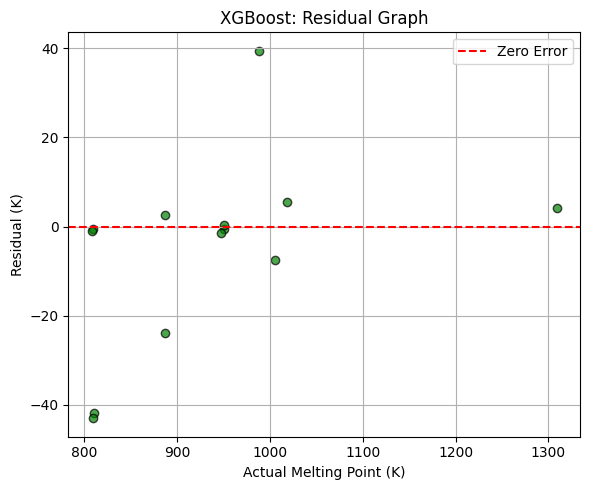

In [ ]:
# Residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, residuals, alpha=0.7, edgecolor='k', color='green') # Plot Residual and Actual
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Zero Error')

# Labels
plt.xlabel("Actual Melting Point (K)")
plt.ylabel("Residual (K)") # Actual - Predicted
plt.title("XGBoost: Residual Graph")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

While XGBoost closely captured the outlier sample from before around 1309 K, the residual plot shows a slight increase in error across the mid-range melting points. This suggests that the model shifted slightly to accommodate the previous outlier. However, the overall prediction accuracy remains high (MAE = 13.24 K, R² = 0.97), indicating a strong generalization across the dataset.

## **Conclusions**

Through a series of regression models (Linear Regression, Random Forest, and XGBoost), I investigated the ability of machine learning to predict the melting point of UF₄ and FUNaK mixtures using thermophysical features such as molar composition and ionic properties.

**What I could conclude:**

*   XGBoost provided the best performance, achieving an MAE of 13.2K and R² of 0.97, significantly outperforming Random Forest (R² = 0.90) and the Linear model (R² = -9.22).

*   Tree based models were effective in capturing nonlinear patterns within the limited dataset, which the linear model was unable to do.

*   Despite the small sample size of 43 compounds, the tree based models were able to generalize well to unseen salts, particularly for the ternary FUNaK salts, which are of primary interest.

*   Scatter and residual plots for the tree based models confirmed that errors were generally small and randomly distributed, with only minor deviation in predictions for mid range melting points.

*   One outlier, a pure UF₄ sample from a 1960 experiment was fit well by XGBoost, suggesting that more complex models are capable of connecting older data with patterns found in more recent experimental results.

**What I could not conclude:**

*   I could not confidently validate model behavior for high temperature uranium salts. This is due to the limited dataset, especially with only two pure UF₄ samples being available publicly.

*   Although the models performed well on the test set, I could not confirm that the test compositions were fully independent of the training set. Some samples had identical/near identical molar compositions, especially for the FUNaK compositions. This may have led to data leakage and overestimated model performance. This overlap is not unexpected, since a handful of specific FUNaK compositions are of interest in the literature, as they correspond to eutectic points derived from phase diagrams. These phase diagrams are often generated using thermodynamic modeling software. As a result, the dataset reflects real experimental and computational focus on key salt systems. Therefore, I cannot state that the models will generalize to entirely unseen salt compositions without further validation.

## **References**

For Image of XGBoost, and explanation of the steps:
*   https://medium.com/@fraidoonomarzai99/xgboost-regression-in-depth-cb2b3f623281

Introduction, previous work mentioned:
*   Glushko, V. P., et al. Thermodynamic Properties of Individual Substances Vol. 1-5. Moscow: Nauka, 1994.
*   Barin, I. Thermochemical Data of Pure Substances. 3rd ed., VCH Publishers, Weinheim, 1995.
*   Tang, Y., et al. (2024). Prediction of molten salt eutectic temperatures using machine learning. Energy, 296, 130485. https://doi.org/10.1016/j.energy.2024.130485

For the **Dataset**, various papers and websites were used:

*   Maxime Fache et al. (2024). Thermophysical Properties of FUNaK (NaF-KF-UF4) Eutectics. https://www.mdpi.com/1996-1944/17/11/2776

*   Bianca S. et al. (2021). Thermodynamic Assessment of the NaF-KF-UF4 System. https://www.mdpi.com/2673-7264/1/2/16

*   Keiser, D. D., et al. (2022). Thermophysical Properties for Molten Salt Reactor Systems. ORNL Technical Report ORNL/TM-2022/1812. Oak Ridge National Laboratory. https://info.ornl.gov/sites/publications/Files/Pub167853.pdf

*   Johnstone, W. R., & Allen, N. P. (1960). The melting points and heats of fusion of uranium tetrafluoride and uranium hexafluoride. Journal of Inorganic and Nuclear Chemistry, 16(3-4), 328-330. https://doi.org/10.1016/0022-1902(60)80194-7

*   NIST Chemistry WebBook. (n.d.). Uranium tetrafluoride thermophysical data. National Institute of Standards and Technology. https://webbook.nist.gov/cgi/cbook.cgi?Name=uranium+tetrafluoride&Units=SI

*   Clifford, T. D., et al. (1976). Thermodynamic analysis of fused salt systems. Nuclear Science and Engineering, 63(5), 467-478. https://doi.org/10.13182/nse63-5